In [48]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from time import time
import SHFunctions as shf
import os

In [53]:
def NewtonSchulz(p, A, Q, X0 = np.NAN, maxiter = 100, tol = np.NAN):
    if np.sum(np.isnan(X0)) > 0: # X0가 주어지지 않았을 때 m by m zero 행렬 처리
        X0 = np.eye(A.shape[0])
    
    if (p <= 0) or (not isinstance(p, int)): # p가 positive integer가 아닐 때 예외처리
        raise ValueError('p가 양의 정수가 아닙니다.')
        
    if A.shape[0] != A.shape[1]: # A가 square matrices의 모음이 아닐 때 예외처리
        raise ValueError('A가 정방행렬이 아닙니다.')
        
    if Q.shape[0] != Q.shape[1]: # Q가 square matrices의 모음이 아닐 때 예외처리
        raise ValueError('Q가 정방행렬이 아닙니다.')
        
    if (Q.shape[0] != A.shape[0]) or (A.shape[1] != Q.shape[1]): # A와 Q가 같은 크기 아닐 때 예외처리
        raise ValueError('A, Q가 같은 크기가 아닙니다.')
        
    m = A.shape[1] # m 초기화
    
    if np.isnan(tol): # tol이 주어지지 않았을 때 초기화
        tol = m * 1e-15
        
    Xs = [X0] # Xs는 X들을 담은 리스트로 초기화
    errs = [] # err 리스트 초기화
    S = np.zeros((A.shape[0],A.shape[1]))
    
    iter = 0
    err = 1e10 # error 초기화
    
    # Newton Iteration 시작
    t = time() # 시간체크
    while (err > tol) and (iter < maxiter):
        X0 = (1/p)*((p-1)*X0 + (Q - A.conj().transpose() @ X0 @ A)@nla.inv(nla.matrix_power(X0,p-1))) # Newton Sequence 적용
        err = nla.norm(nla.matrix_power(X0, p) - (Q - (A.conj()).transpose() @ X0 @ A), 'fro') # err 계산

        Xs.append(X0) # X_i 저장
        errs.append(err) # err 저장
        
        iter += 1
    
    calcultime = time() - t
    S = Xs[-1] # Solution
    
    # Vectorize of S - X_{i}와 X_{i+1} - X_{i} : cos 계산
    vSmX = []
    vXmX = []
    for i in range(len(Xs)-1):
        vSmX.append(np.reshape(S - Xs[i], S.shape[0]*S.shape[1], order='F'))
        vXmX.append(np.reshape(Xs[i+1] - Xs[i], S.shape[0]*S.shape[1], order='F'))
    cSX = []
    cXX = []
    for i in range(len(vSmX)-1):
        x1, y1 = vSmX[i+1], vSmX[i]
        x2, y2 = vXmX[i+1], vXmX[i]
        c1 = np.dot(x1,y1) / (nla.norm(x1,2)*nla.norm(y1,2))
        c2 = np.dot(x2,y2) / (nla.norm(x2,2)*nla.norm(y2,2))
        cSX.append(c1)
        cXX.append(c2)
    return {'sol':S, 'Xs':Xs, 'errs':errs, 'time':calcultime, 'SmX':vSmX, 'XmX':vXmX, 'csSmX':cSX, 'csXmX':cXX}

In [54]:
p = 2
A = np.array([[0.5, -0.45],[0.45, 0]]);
Q = 0.8*np.eye(2);

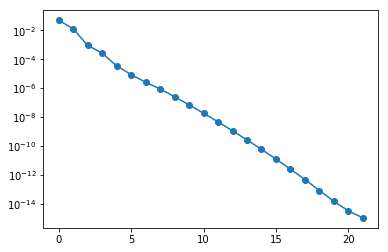

In [55]:
Ss = NewtonSchulz(p, A, Q)
ax = plt.subplot(111)
ax.semilogy(Ss['errs'],'-o')

In [57]:
S = Ss['sol']
print(S)
print(Ss['time'])
print(nla.matrix_power(S, p) - (Q - A.conj().transpose() @ S @ A))

[[0.64065035 0.1154399 ]
 [0.1154399  0.81051954]]
0.0019333362579345703
[[-4.44089210e-16  6.10622664e-16]
 [-5.82867088e-16  3.33066907e-16]]


In [62]:
Ss['csXmX']

[0.75435873611679,
 -0.529916437529282,
 0.3124923557742276,
 0.07819011039854923,
 -0.5904179286898757,
 -0.6916489523483319,
 -0.9601909759314716,
 -0.9428430493976712,
 -0.9928913849024102,
 -0.9958040582067003,
 -0.996943504777357,
 -0.9981821845319059,
 -0.9982872949701811,
 -0.9982773947522261,
 -0.9979810555426348,
 -0.9971212556173819,
 -0.9950646278502743,
 -0.9892513847903949,
 -0.9689702311440419,
 -0.8911692731179054,
 -0.7653424496578828]